<a href="https://colab.research.google.com/github/jduell12/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [2]:
import pandas as pd

# Pandas Display Options:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 100)

In [3]:
# Lets take a look at the Ames Iowa Housing Dataset:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

### Specific Columns hold specific kinds of data

In [4]:
print(df.shape)
df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [5]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Some columns hold float values like the `LotFrontage` column.

In [6]:
# Look at the first ten rows of the `LotFrontage` column.
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [7]:
df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [8]:
# NaN is the most common value in this column. What is a NaN
import numpy as np 

type(np.NaN)

float

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [9]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small_df = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.head()

TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice
0          856       856       854     208500
1         1262      1262         0     181500
2          920       920       866     223500
3          756       961       756     140000
4         1145      1145      1053     250000

In [10]:
small_df.dtypes

TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
SalePrice      int64
dtype: object

### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [11]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset

# Using bracket syntax to make a new 'TotalSquareFootage' column
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']
small_df.head()


TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice  TotalSquareFootage
0          856       856       854     208500                2566
1         1262      1262         0     181500                2524
2          920       920       866     223500                2706
3          756       961       756     140000                2473
4         1145      1145      1053     250000                3343

In [12]:
# Lets make another new column that is 'PricePerSqFt' by
# dividing the price by the square footage

small_df['PricePerSqFt'] = small_df['SalePrice'] / small_df['TotalSquareFootage']
small_df.head()

TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice  TotalSquareFootage  \
0          856       856       854     208500                2566   
1         1262      1262         0     181500                2524   
2          920       920       866     223500                2706   
3          756       961       756     140000                2473   
4         1145      1145      1053     250000                3343   

   PricePerSqFt  
0     81.254871  
1     71.909667  
2     82.594235  
3     56.611403  
4     74.783129

Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [13]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-11-11 16:49:24--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 34.209.169.217, 52.10.168.94, 52.10.247.232
Connecting to resources.lendingclub.com (resources.lendingclub.com)|34.209.169.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [              <=>   ]  22.37M  2.90MB/s    in 9.6s    

2020-11-11 16:49:34 (2.32 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23459818]



We need to use the `!unzip` command to extract the csv from the zipped folder.

In [14]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


We can also use bash/shell commands to look at the raw file using the `!head` and `!tail` commands

In [15]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [16]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","2122.97","2122.97","4554.49","4554.49","3477.03","1077.46","0.0","0.0","0.0","Oct-2020","190.21","Nov-2020","Oct-2020","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.

As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [17]:
# Read in the CSV
df = pd.read_csv('LoanStats_2018Q4.csv', header=1)
# df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    20000.0      20000.0          20000.0   36 months   
1  NaN        NaN    12000.0      12000.0          12000.0   36 months   
2  NaN        NaN     7000.0       7000.0           6975.0   36 months   
3  NaN        NaN    25000.0      25000.0          25000.0   60 months   
4  NaN        NaN    10400.0      10400.0          10400.0   36 months   

  int_rate  installment grade sub_grade                   emp_title  \
0   14.47%       688.13     C        C2                  bus driver   
1   16.14%       422.72     C        C4       Sales Account Manager   
2   10.72%       228.25     B        B2            Business Analyst   
3   16.14%       609.82     C        C4          Production Manager   
4   12.98%       350.32     B        B5  Program Support Assistant    

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0    4 years            OWN     52000.0     Source Verified  Dec-2018   
1    4 years           RENT     70000.0     Source Verified  Dec-2018   
2   < 1 year       MORTGAGE     97000.0     Source Verified  Dec-2018   
3    5 years       MORTGAGE     45000.0        Not Verified  Dec-2018   
4  10+ years       MORTGAGE     56099.0     Source Verified  Dec-2018   

          loan_status pymnt_plan  url  desc             purpose  \
0         Charged Off          n  NaN   NaN  debt_consolidation   
1  Late (31-120 days)          n  NaN   NaN         credit_card   
2          Fully Paid          n  NaN   NaN               other   
3          Fully Paid          n  NaN   NaN  debt_consolidation   
4             Current          n  NaN   NaN         credit_card   

                     title zip_code addr_state    dti  delinq_2yrs  \
0       Debt consolidation    681xx         NE  30.65          1.0   
1  Credit card refinancing    333xx         FL  18.96          0.0   
2                    Other    201xx         VA  33.17          0.0   
3       Debt consolidation    703xx         LA  37.09          0.0   
4  Credit card refinancing    800xx         CO  20.92          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jun-1979             2.0                    15.0   
1         Nov-2013             0.0                     NaN   
2         Sep-2011             1.0                     NaN   
3         Sep-2003             0.0                     NaN   
4         Jul-2013             2.0                    32.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       6.0      0.0    15048.0        73%       22.0   
1                     NaN       6.0      0.0    13663.0      61.8%        7.0   
2                     NaN      18.0      0.0     1988.0       7.5%       30.0   
3                     NaN       7.0      0.0     8901.0      36.8%       21.0   
4                    67.0       8.0      1.0     1669.0       9.8%       10.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w       0.00           0.00   8169.130000   
1                   w    5588.75        5588.75   8747.380000   
2                   f       0.00           0.00   7197.516809   
3                   w       0.00           0.00  26653.167580   
4                   w    4824.16        4824.16   7345.470000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          8169.13          5731.54        2437.59                 0.0   
1          8747.38          6411.25        2336.13                 0.0   
2          7171.81          7000.00         197.52                 0.0   
3         26653.17         25000.00        1653.17                 0.0   
4          7345.47          5575.84        1769.63                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Feb-2020             0.00   
1         0.0                

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [18]:
# We can fix the header problem by using the 'skiprows' parameter
# df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)
df.shape

(128414, 144)

Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [19]:
# Sum null values by column and sort from least to greatest
df.isnull().sum().sort_values()

inq_fi                                             2
mo_sin_old_rev_tl_op                               2
delinq_amnt                                        2
chargeoff_within_12_mths                           2
acc_open_past_24mths                               2
inq_last_12m                                       2
total_cu_tl                                        2
total_rev_hi_lim                                   2
open_rv_24m                                        2
open_rv_12m                                        2
total_bal_il                                       2
open_il_24m                                        2
open_il_12m                                        2
open_act_il                                        2
open_acc_6m                                        2
tot_cur_bal                                        2
tot_coll_amt                                       2
acc_now_delinq                                     2
application_type                              

In [20]:
# Address the extra NaNs in each column by skipping the footer as well.
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
df.shape
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      20000        20000          20000.0   36 months   
1 NaN        NaN      12000        12000          12000.0   36 months   
2 NaN        NaN       7000         7000           6975.0   36 months   
3 NaN        NaN      25000        25000          25000.0   60 months   
4 NaN        NaN      10400        10400          10400.0   36 months   

  int_rate  installment grade sub_grade                   emp_title  \
0   14.47%       688.13     C        C2                  bus driver   
1   16.14%       422.72     C        C4       Sales Account Manager   
2   10.72%       228.25     B        B2            Business Analyst   
3   16.14%       609.82     C        C4          Production Manager   
4   12.98%       350.32     B        B5  Program Support Assistant    

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0    4 years            OWN     52000.0     Source Verified  Dec-2018   
1    4 years           RENT     70000.0     Source Verified  Dec-2018   
2   < 1 year       MORTGAGE     97000.0     Source Verified  Dec-2018   
3    5 years       MORTGAGE     45000.0        Not Verified  Dec-2018   
4  10+ years       MORTGAGE     56099.0     Source Verified  Dec-2018   

          loan_status pymnt_plan  url  desc             purpose  \
0         Charged Off          n  NaN   NaN  debt_consolidation   
1  Late (31-120 days)          n  NaN   NaN         credit_card   
2          Fully Paid          n  NaN   NaN               other   
3          Fully Paid          n  NaN   NaN  debt_consolidation   
4             Current          n  NaN   NaN         credit_card   

                     title zip_code addr_state    dti  delinq_2yrs  \
0       Debt consolidation    681xx         NE  30.65            1   
1  Credit card refinancing    333xx         FL  18.96            0   
2                    Other    201xx         VA  33.17            0   
3       Debt consolidation    703xx         LA  37.09            0   
4  Credit card refinancing    800xx         CO  20.92            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jun-1979               2                    15.0   
1         Nov-2013               0                     NaN   
2         Sep-2011               1                     NaN   
3         Sep-2003               0                     NaN   
4         Jul-2013               2                    32.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         6        0      15048        73%         22   
1                     NaN         6        0      13663      61.8%          7   
2                     NaN        18        0       1988       7.5%         30   
3                     NaN         7        0       8901      36.8%         21   
4                    67.0         8        1       1669       9.8%         10   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w       0.00           0.00   8169.130000   
1                   w    5588.75        5588.75   8747.380000   
2                   f       0.00           0.00   7197.516809   
3                   w       0.00           0.00  26653.167580   
4                   w    4824.16        4824.16   7345.470000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          8169.13          5731.54        2437.59                 0.0   
1          8747.38          6411.25        2336.13                 0.0   
2          7171.81          7000.00         197.52                 0.0   
3         26653.17         25000.00        1653.17                 0.0   
4          7345.47          5575.84        1769.63                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Feb-2020             0.00   
1         0.0                     

For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

In [21]:
#Lending club has those columns in their system but not putting out for public use because it could be sensitive data
df1 = df.drop(['desc', 'url', 'member_id', 'id'], axis=1)
#axis=1 working on columns 
#axis=0 working on rows 
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      20000        20000          20000.0   36 months   14.47%       688.13   
1      12000        12000          12000.0   36 months   16.14%       422.72   
2       7000         7000           6975.0   36 months   10.72%       228.25   
3      25000        25000          25000.0   60 months   16.14%       609.82   
4      10400        10400          10400.0   36 months   12.98%       350.32   

  grade sub_grade                   emp_title emp_length home_ownership  \
0     C        C2                  bus driver    4 years            OWN   
1     C        C4       Sales Account Manager    4 years           RENT   
2     B        B2            Business Analyst   < 1 year       MORTGAGE   
3     C        C4          Production Manager    5 years       MORTGAGE   
4     B        B5  Program Support Assistant   10+ years       MORTGAGE   

   annual_inc verification_status   issue_d         loan_status pymnt_plan  \
0     52000.0     Source Verified  Dec-2018         Charged Off          n   
1     70000.0     Source Verified  Dec-2018  Late (31-120 days)          n   
2     97000.0     Source Verified  Dec-2018          Fully Paid          n   
3     45000.0        Not Verified  Dec-2018          Fully Paid          n   
4     56099.0     Source Verified  Dec-2018             Current          n   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    681xx         NE  30.65   
1         credit_card  Credit card refinancing    333xx         FL  18.96   
2               other                    Other    201xx         VA  33.17   
3  debt_consolidation       Debt consolidation    703xx         LA  37.09   
4         credit_card  Credit card refinancing    800xx         CO  20.92   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            1         Jun-1979               2                    15.0   
1            0         Nov-2013               0                     NaN   
2            0         Sep-2011               1                     NaN   
3            0         Sep-2003               0                     NaN   
4            0         Jul-2013               2                    32.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         6        0      15048        73%         22   
1                     NaN         6        0      13663      61.8%          7   
2                     NaN        18        0       1988       7.5%         30   
3                     NaN         7        0       8901      36.8%         21   
4                    67.0         8        1       1669       9.8%         10   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w       0.00           0.00   8169.130000   
1                   w    5588.75        5588.75   8747.380000   
2                   f       0.00           0.00   7197.516809   
3                   w       0.00           0.00  26653.167580   
4                   w    4824.16        4824.16   7345.470000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          8169.13          5731.54        2437.59                 0.0   
1          8747.38          6411.25        2336.13                 0.0   
2          7171.81          7000.00         197.52                 0.0   
3         26653.17         25000.00        1653.17                 0.0   
4          7345.47          5575.84        1769.63                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Feb-2020             0.00   
1         0.0                      0.0     Aug-2020           422.72   
2         0.0                      0.0     Jul-2019          1346.14   
3         0.0                      0.0     Apr-2019         24857.33   
4    

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [22]:
# Look at the first 10 values of the int_rate column
df1['int_rate'].head(10)

0     14.47%
1     16.14%
2     10.72%
3     16.14%
4     12.98%
5      7.56%
6     17.97%
7     14.47%
8     18.94%
9     11.31%
Name: int_rate, dtype: object

In [23]:
# Look at a specific value from the int_rate column
df1['int_rate'][0]

' 14.47%'

In [24]:
df1['int_rate'][5]

'  7.56%'

Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [25]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = " 12.45%"
int_rate

' 12.45%'

In [26]:
#removes white space
int_rate.strip()

'12.45%'

In [27]:
#removes % sign
int_rate.strip('%')

' 12.45'

In [28]:
#add the strip methods to each other to get everything done on the string 
int_rate = int_rate.strip().strip('%')
int_rate

'12.45'

In [29]:
# "Cast" the string value to a float
int_rate = float(int_rate)

In [30]:
int_rate

12.45

In [31]:
int_rate = ' 12.5%'
#do it all in one line 
float(int_rate.strip().strip('%'))

12.5

### Write a function to make our solution reusable!

In [32]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.
def int_rate_to_float(int_rate):
  return float(int_rate.strip().strip('%'))

In [33]:
# Test out our function by calling it on our example
int_rate_to_float(' 14.57%')

14.57

In [34]:
# is the data type correct?
type(int_rate_to_float(' 14.57%'))

float

### Apply our solution to every cell in a column

In [35]:
#long way to changing a column (For Loop)
cleaned_int_rates = []

for int_rate in df1['int_rate']:
  cleaned_int_rates.append(int_rate_to_float(int_rate))

df1['cleaned_int_rate'] = pd.Series(cleaned_int_rates)
df1['cleaned_int_rate'].mean()

12.928038734699745

In [36]:
#better way than a for loop to modify multiple items in a dataframe
df1['int_rate_2'] = df1['int_rate'].apply(int_rate_to_float)
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      20000        20000          20000.0   36 months   14.47%       688.13   
1      12000        12000          12000.0   36 months   16.14%       422.72   
2       7000         7000           6975.0   36 months   10.72%       228.25   
3      25000        25000          25000.0   60 months   16.14%       609.82   
4      10400        10400          10400.0   36 months   12.98%       350.32   

  grade sub_grade                   emp_title emp_length home_ownership  \
0     C        C2                  bus driver    4 years            OWN   
1     C        C4       Sales Account Manager    4 years           RENT   
2     B        B2            Business Analyst   < 1 year       MORTGAGE   
3     C        C4          Production Manager    5 years       MORTGAGE   
4     B        B5  Program Support Assistant   10+ years       MORTGAGE   

   annual_inc verification_status   issue_d         loan_status pymnt_plan  \
0     52000.0     Source Verified  Dec-2018         Charged Off          n   
1     70000.0     Source Verified  Dec-2018  Late (31-120 days)          n   
2     97000.0     Source Verified  Dec-2018          Fully Paid          n   
3     45000.0        Not Verified  Dec-2018          Fully Paid          n   
4     56099.0     Source Verified  Dec-2018             Current          n   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    681xx         NE  30.65   
1         credit_card  Credit card refinancing    333xx         FL  18.96   
2               other                    Other    201xx         VA  33.17   
3  debt_consolidation       Debt consolidation    703xx         LA  37.09   
4         credit_card  Credit card refinancing    800xx         CO  20.92   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            1         Jun-1979               2                    15.0   
1            0         Nov-2013               0                     NaN   
2            0         Sep-2011               1                     NaN   
3            0         Sep-2003               0                     NaN   
4            0         Jul-2013               2                    32.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         6        0      15048        73%         22   
1                     NaN         6        0      13663      61.8%          7   
2                     NaN        18        0       1988       7.5%         30   
3                     NaN         7        0       8901      36.8%         21   
4                    67.0         8        1       1669       9.8%         10   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w       0.00           0.00   8169.130000   
1                   w    5588.75        5588.75   8747.380000   
2                   f       0.00           0.00   7197.516809   
3                   w       0.00           0.00  26653.167580   
4                   w    4824.16        4824.16   7345.470000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          8169.13          5731.54        2437.59                 0.0   
1          8747.38          6411.25        2336.13                 0.0   
2          7171.81          7000.00         197.52                 0.0   
3         26653.17         25000.00        1653.17                 0.0   
4          7345.47          5575.84        1769.63                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Feb-2020             0.00   
1         0.0                      0.0     Aug-2020           422.72   
2         0.0                      0.0     Jul-2019          1346.14   
3         0.0                      0.0     Apr-2019         24857.33   
4    

## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [66]:
# Look at the top 20 employment 
df1['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [64]:
# How many different unique employment titles are there currently?
df1['emp_title'].nunique()

43892

In [65]:
# How often is the employment_title null?
df1['emp_title'].isnull().sum()

20947

What are some possible reasons as to why a person's employment title may have not been provided?

In [44]:
# Create some examples that represent the cases that we want to clean up
examples = ['owner', 'Owner', ' Project Manager', np.NaN]

In [55]:
# Write a function to clean up these use cases and increase uniformity.
def clean_emp_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'

for example in examples:
   print(clean_emp_title(example))


Owner
Owner
Project Manager
Unknown


In [78]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_emp_title(title) for title in examples]

['Owner', 'Owner', 'Project Manager', 'Unknown']

In [72]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
df1['emp_title'] = df1['emp_title'].apply(clean_emp_title)

We can use the same code as we did earlier to see how much progress was made.


In [73]:
# Look at the top 20 employment titles
df1['emp_title'].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [74]:
# How many different unique employment titles are there currently?
df1['emp_title'].nunique()

34902

In [75]:
# How often is the employment_title null (NaN)?
df1['emp_title'].isnull().sum()

0

## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [79]:
[col for col in df1 if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

Lets look at the string format of the `issue_d` column

In [81]:
df1['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [82]:
df['issue_d'].value_counts()

Oct-2018    46305
Nov-2018    41973
Dec-2018    40134
Name: issue_d, dtype: int64

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [84]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], infer_datetime_format=True)

In [86]:
df1['issue_d'].value_counts()

2018-10-01    46305
2018-11-01    41973
2018-12-01    40134
Name: issue_d, dtype: int64

Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [88]:
df1['issue_d'][0]

Timestamp('2018-12-01 00:00:00')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [89]:
df1['issue_d'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [90]:
df1['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_d, Length: 128412, dtype: int64

Now the month.

In [91]:
df1['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128407    10
128408    10
128409    10
128410    10
128411    10
Name: issue_d, Length: 128412, dtype: int64

It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [92]:
df1['issue_year'] = df1['issue_d'].dt.year
df1['issue_month'] = df1['issue_d'].dt.month

In [93]:
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      20000        20000          20000.0   36 months   14.47%       688.13   
1      12000        12000          12000.0   36 months   16.14%       422.72   
2       7000         7000           6975.0   36 months   10.72%       228.25   
3      25000        25000          25000.0   60 months   16.14%       609.82   
4      10400        10400          10400.0   36 months   12.98%       350.32   

  grade sub_grade                  emp_title emp_length home_ownership  \
0     C        C2                 Bus Driver    4 years            OWN   
1     C        C4      Sales Account Manager    4 years           RENT   
2     B        B2           Business Analyst   < 1 year       MORTGAGE   
3     C        C4         Production Manager    5 years       MORTGAGE   
4     B        B5  Program Support Assistant  10+ years       MORTGAGE   

   annual_inc verification_status    issue_d         loan_status pymnt_plan  \
0     52000.0     Source Verified 2018-12-01         Charged Off          n   
1     70000.0     Source Verified 2018-12-01  Late (31-120 days)          n   
2     97000.0     Source Verified 2018-12-01          Fully Paid          n   
3     45000.0        Not Verified 2018-12-01          Fully Paid          n   
4     56099.0     Source Verified 2018-12-01             Current          n   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    681xx         NE  30.65   
1         credit_card  Credit card refinancing    333xx         FL  18.96   
2               other                    Other    201xx         VA  33.17   
3  debt_consolidation       Debt consolidation    703xx         LA  37.09   
4         credit_card  Credit card refinancing    800xx         CO  20.92   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            1         Jun-1979               2                    15.0   
1            0         Nov-2013               0                     NaN   
2            0         Sep-2011               1                     NaN   
3            0         Sep-2003               0                     NaN   
4            0         Jul-2013               2                    32.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         6        0      15048        73%         22   
1                     NaN         6        0      13663      61.8%          7   
2                     NaN        18        0       1988       7.5%         30   
3                     NaN         7        0       8901      36.8%         21   
4                    67.0         8        1       1669       9.8%         10   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w       0.00           0.00   8169.130000   
1                   w    5588.75        5588.75   8747.380000   
2                   f       0.00           0.00   7197.516809   
3                   w       0.00           0.00  26653.167580   
4                   w    4824.16        4824.16   7345.470000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          8169.13          5731.54        2437.59                 0.0   
1          8747.38          6411.25        2336.13                 0.0   
2          7171.81          7000.00         197.52                 0.0   
3         26653.17         25000.00        1653.17                 0.0   
4          7345.47          5575.84        1769.63                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Feb-2020             0.00   
1         0.0                      0.0     Aug-2020           422.72   
2         0.0                      0.0     Jul-2019          1346.14   
3         0.0                      0.0     Apr-2019         24857.33   
4    

Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [94]:
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], infer_datetime_format=True)
df1['earliest_cr_line'].head()

0   1979-06-01
1   2013-11-01
2   2011-09-01
3   2003-09-01
4   2013-07-01
Name: earliest_cr_line, dtype: datetime64[ns]

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

In [98]:
(df1['issue_d']-df1['earliest_cr_line']).dt.days / 365

0         39.528767
1          5.084932
2          7.254795
3         15.260274
4          5.421918
            ...    
128407    33.189041
128408    36.276712
128409    12.342466
128410    10.005479
128411    12.090411
Length: 128412, dtype: float64

In [100]:
df1['credit_length_years'] = (df1['issue_d']-df1['earliest_cr_line']).dt.days / 365
df1.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      20000        20000          20000.0   36 months   14.47%       688.13   
1      12000        12000          12000.0   36 months   16.14%       422.72   
2       7000         7000           6975.0   36 months   10.72%       228.25   
3      25000        25000          25000.0   60 months   16.14%       609.82   
4      10400        10400          10400.0   36 months   12.98%       350.32   

  grade sub_grade                  emp_title emp_length home_ownership  \
0     C        C2                 Bus Driver    4 years            OWN   
1     C        C4      Sales Account Manager    4 years           RENT   
2     B        B2           Business Analyst   < 1 year       MORTGAGE   
3     C        C4         Production Manager    5 years       MORTGAGE   
4     B        B5  Program Support Assistant  10+ years       MORTGAGE   

   annual_inc verification_status    issue_d         loan_status pymnt_plan  \
0     52000.0     Source Verified 2018-12-01         Charged Off          n   
1     70000.0     Source Verified 2018-12-01  Late (31-120 days)          n   
2     97000.0     Source Verified 2018-12-01          Fully Paid          n   
3     45000.0        Not Verified 2018-12-01          Fully Paid          n   
4     56099.0     Source Verified 2018-12-01             Current          n   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    681xx         NE  30.65   
1         credit_card  Credit card refinancing    333xx         FL  18.96   
2               other                    Other    201xx         VA  33.17   
3  debt_consolidation       Debt consolidation    703xx         LA  37.09   
4         credit_card  Credit card refinancing    800xx         CO  20.92   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            1       1979-06-01               2                    15.0   
1            0       2013-11-01               0                     NaN   
2            0       2011-09-01               1                     NaN   
3            0       2003-09-01               0                     NaN   
4            0       2013-07-01               2                    32.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         6        0      15048        73%         22   
1                     NaN         6        0      13663      61.8%          7   
2                     NaN        18        0       1988       7.5%         30   
3                     NaN         7        0       8901      36.8%         21   
4                    67.0         8        1       1669       9.8%         10   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w       0.00           0.00   8169.130000   
1                   w    5588.75        5588.75   8747.380000   
2                   f       0.00           0.00   7197.516809   
3                   w       0.00           0.00  26653.167580   
4                   w    4824.16        4824.16   7345.470000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          8169.13          5731.54        2437.59                 0.0   
1          8747.38          6411.25        2336.13                 0.0   
2          7171.81          7000.00         197.52                 0.0   
3         26653.17         25000.00        1653.17                 0.0   
4          7345.47          5575.84        1769.63                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Feb-2020             0.00   
1         0.0                      0.0     Aug-2020           422.72   
2         0.0                      0.0     Jul-2019          1346.14   
3         0.0                      0.0     Apr-2019         24857.33   
4    

What's oldest credit history that was involved in Q4 2018? 

In [101]:
df1['credit_length_years'].describe()

count    128412.000000
mean         16.054497
std           7.908317
min           3.084932
25%          11.093151
50%          14.427397
75%          19.846575
max          68.961644
Name: credit_length_years, dtype: float64

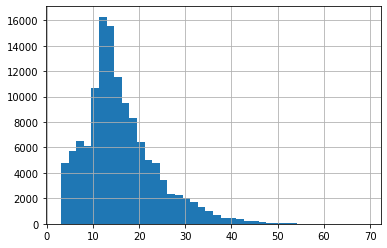

In [105]:
df1['credit_length_years'].hist(bins=40);

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.